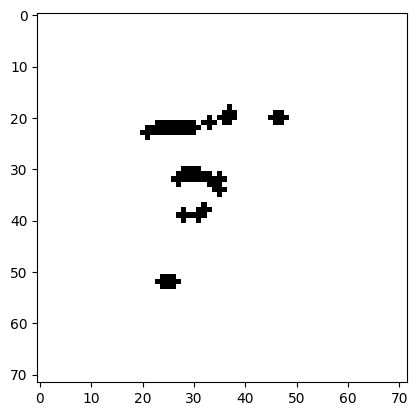

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
# Morphological filtering
from skimage.morphology import opening
from skimage.morphology import disk

# Data handling
import numpy as np

# Connected component filtering
import cv2

black = 0
white = 255
threshold = 165

# Define the folder path where the image is located
folder_path = "preview_images/Hiragana/か"

# Define the filename of the image to process
filename = "か_60.png"

# Load the image
img = Image.open(os.path.join(folder_path, filename)).convert("LA")
img = img.resize((72,72))
pixels = np.array(img)[:,:,0]

# Apply the thresholding
pixels[pixels > threshold] = white
pixels[pixels < threshold] = black

# Morphological opening
blobSize = 1 # Select the maximum radius of the blobs you would like to remove
structureElement = disk(blobSize)  # you can define different shapes, here we take a disk shape
# We need to invert the image such that black is background and white foreground to perform the opening
pixels = np.invert(opening(np.invert(pixels), structureElement))

newImg = Image.fromarray(pixels).convert('RGB')
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(np.invert(pixels), connectivity=8)
# Display the modified image
plt.imshow(newImg)
plt.show()
